In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

### Different Types of Images

1. Binary - 2D Matrix Boolean
2. Grayscale - 2D Matrix uint8
3. Color (Colour Spaces *[RGB,BGR,HSV,CMY]*) - 3D Matrix uint8

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


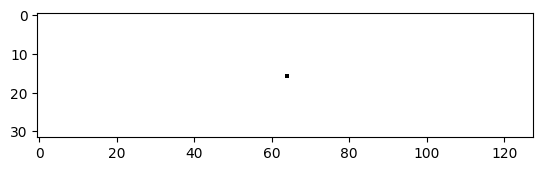

In [3]:
# Binary
# Generate a 32 column by 128 column matrx as a binary image. Change the center pixel to true
image = np.zeros((32,128),dtype=bool)
print(image)

rows_centre = image.shape[0] // 2 # // is division ignoring the remainder
columns_centre = image.shape[1] // 2

image[rows_centre, columns_centre] = True # set middle pixel to true

plt.imshow(image, cmap="binary")
plt.show()


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


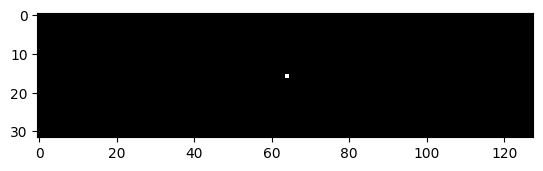

In [4]:
# Grayscale
# Generate a 32 column by 128 column matrx as a grayscale image. Change the center pixel to white

image = np.zeros((32,128),dtype="uint8")
print(image)

rows_centre = image.shape[0] // 2 # // is division ignoring the remainder (not the same as modulus)
columns_centre = image.shape[1] // 2

image[rows_centre, columns_centre] = 255 # set middle pixel to white

plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


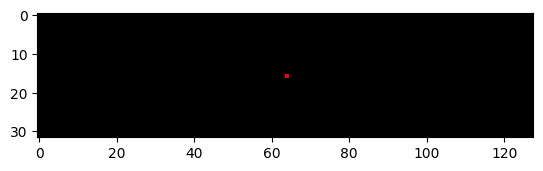

In [5]:
# Colour
# Generate a 32 column by 128 column matrx as a colour image. Change the center pixel to red

image = np.zeros((32,128,3),dtype="uint8")
print(image)

rows_centre = image.shape[0] // 2 # // is division ignoring the remainder (not the same as modulus)
columns_centre = image.shape[1] // 2

image[rows_centre, columns_centre] = [255,0,0] # set middle pixel to red

plt.imshow(image)
plt.show()

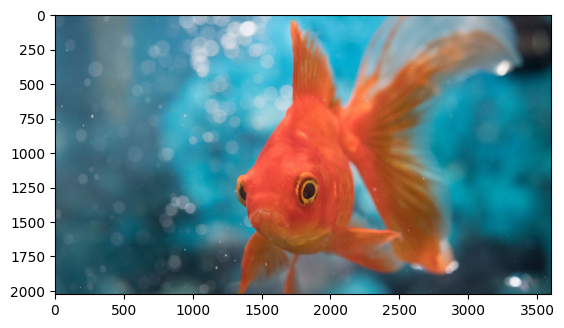

In [6]:
# Loading an image from disk and displaying it as RGB

imBGR = cv2.imread('./images/goldfish.jpg') # as Default the image is read as BGR instead of RGB
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB) # this converts from BGR to RGB
plt.imshow(imRGB)
plt.show()


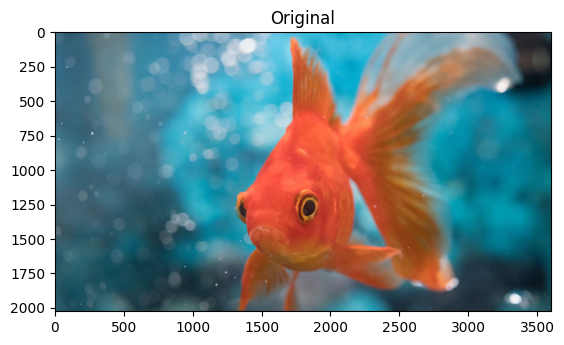

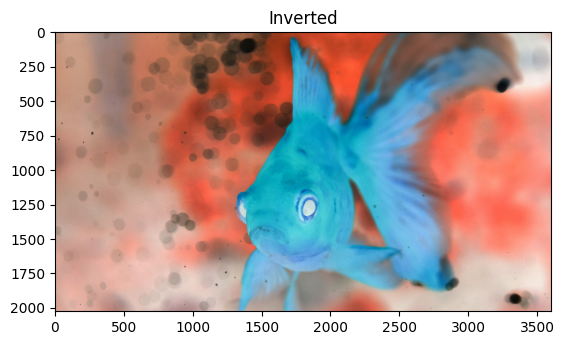

In [7]:
# invert all pixels in the image (negative of the image)

imBGR = cv2.imread('./images/goldfish.jpg') # as Default the image is read as BGR instead of RGB
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB) # this converts from BGR to RGB
plt.title("Original")
plt.imshow(imRGB)
plt.show()
invertedRGB = 255-imRGB

plt.title("Inverted")
plt.imshow(invertedRGB)
plt.show()


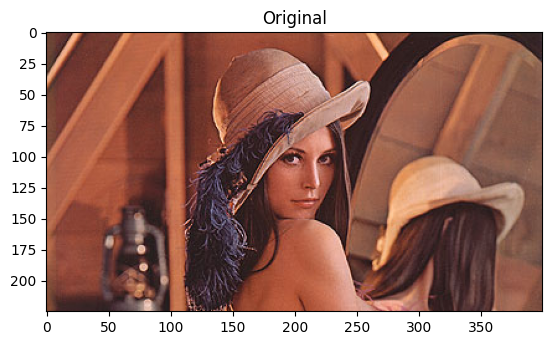

(225, 400, 3)


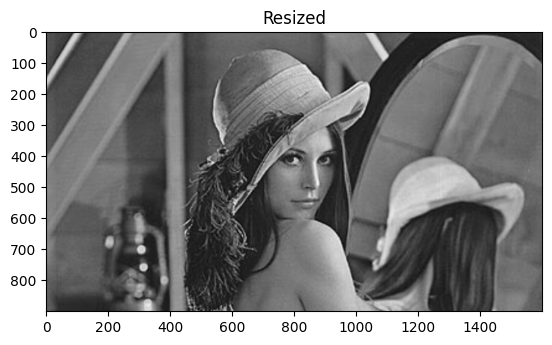

In [11]:
imBGR = cv2.imread('./images/lena.jpg') # as Default the image is read as BGR instead of RGB
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB) # this converts from BGR to RGB
imGRAY = cv2.cvtColor(imBGR,cv2.COLOR_BGRA2GRAY) # this converts from BGR to grayscale

plt.title("Original")
plt.imshow(imRGB, cmap="gray", vmin=0, vmax=255)
plt.show()

print(imRGB.shape)

imGrayResized = cv2.resize(imGRAY,(imGRAY.shape[1] * 4, imGRAY.shape[0] * 4)) #open cv is columns(x), rows(y)
plt.title("Resized")
plt.imshow(imGrayResized, cmap="gray")
plt.show()

#output using opencv

cv2.imshow("Display Window", imGrayResized)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


<function matplotlib.pyplot.show(close=None, block=None)>

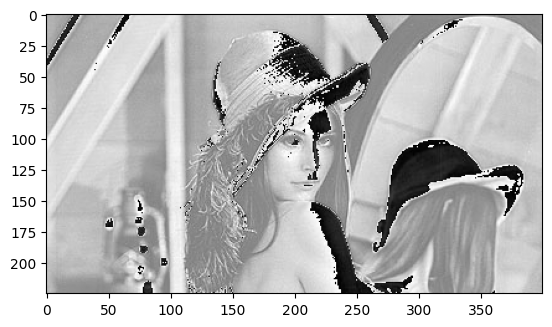

In [17]:
imBGR = cv2.imread('./images/lena.jpg') # as Default the image is read as BGR instead of RGB
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB) # this converts from BGR to RGB
imGRAY = cv2.cvtColor(imBGR,cv2.COLOR_BGRA2GRAY) # this converts from BGR to grayscale

imBright = imGRAY+100

plt.imshow(imBright, cmap="gray")
plt.show

#Note the Numerical overflow


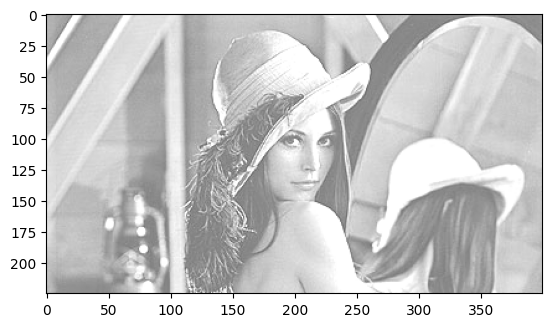

In [19]:

#Option 1
brightvalue=100

rows,columns = imGRAY.shape
imBright = np.zeros(imGRAY.shape, dtype="uint8")

for r in range(rows):
    for c in range(columns):
        if (int(imGRAY[r,c])+brightvalue)>255:
            imBright[r,c] =255
        else:
            imBright[r,c]= imGRAY[r,c] +brightvalue

plt.imshow(imBright, cmap="gray",vmin=0,vmax=255)

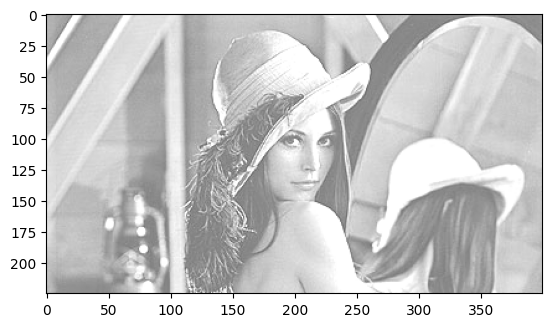

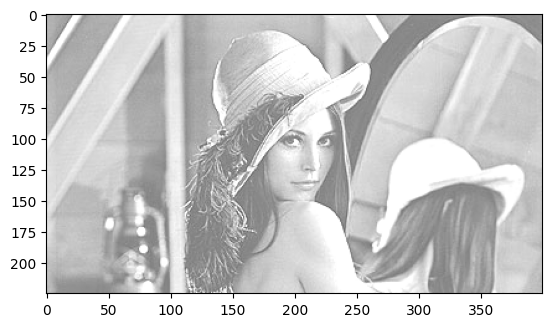

In [ ]:
#option 2 using np.where

imGrayBrightOpt2 = np.where(imGRAY.astype(int)+brightvalue>255, 255, imGRAY+brightvalue)
plt.imshow(imGrayBrightOpt2, cmap="gray",vmin=0,vmax=255)
plt.show()

#option 3 using np.clip

imGraybright3 = np.clip(imGRAY.astype(int)+brightvalue,0,255)
plt.imshow(imGraybright3, cmap="gray",vmin=0,vmax=255)
plt.show()


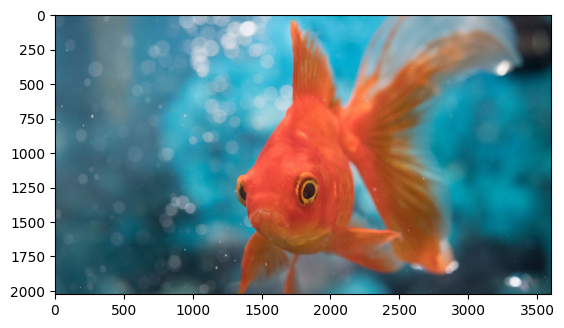

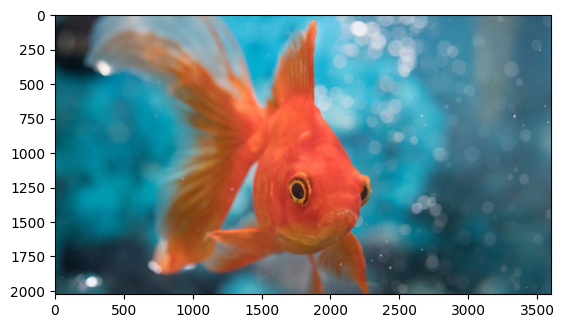

In [24]:
#flip the goldfish hotizontally using numpy colon notation
imBGR = cv2.imread('./images/goldfish.jpg') # as Default the image is read as BGR instead of RGB
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB) # this converts from BGR to RGB
plt.imshow(imRGB)
plt.show()

imflipped = imRGB[:,::-1,:]

plt.imshow(imflipped)
plt.show()

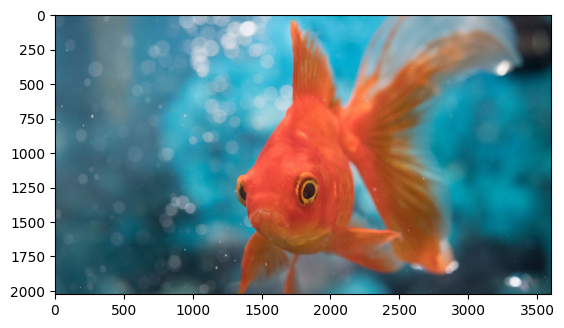

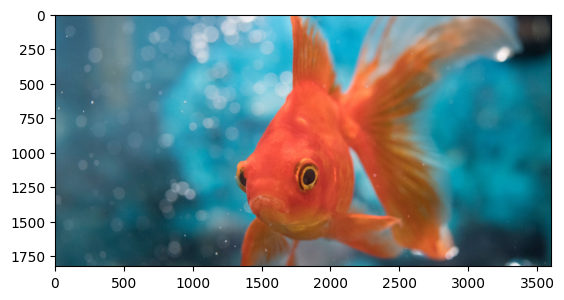

In [27]:
#draw a white border instead of the 100 px at the top and bottom of the image
imBGR = cv2.imread('./images/goldfish.jpg') # as Default the image is read as BGR instead of RGB
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB) # this converts from BGR to RGB
plt.imshow(imRGB)
plt.show()

imRGB[:100,:,:] = 255
imRGB[-100:,:,:] = 255
plt.imshow(imRGB)
plt.show

# instead of borders crop the image 100 pixels from top and bottom 

imCropped = imRGB[100:-100,:,:]
plt.imshow(imCropped)
